In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [27]:
sp500 = yf.Ticker("^GSPC")
data = sp500.history(period="1y")

Dow_Jones = yf.Ticker("^DJI")
data1 = Dow_Jones.history(period="1y")

Nasdaq = yf.Ticker("^NDX")
data2 = Nasdaq.history(period="1y")

data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,0.0,0.0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,0.0,0.0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,0.0,0.0
2024-04-18 00:00:00-04:00,5031.520020,5056.660156,5001.890137,5011.120117,3619760000,0.0,0.0
2024-04-19 00:00:00-04:00,5005.439941,5019.020020,4953.560059,4967.229980,3878750000,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-08 00:00:00-04:00,5193.569824,5267.470215,4910.419922,4982.770020,7408140000,0.0,0.0
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,0.0,0.0
2025-04-10 00:00:00-04:00,5353.149902,5353.149902,5115.270020,5268.049805,6677140000,0.0,0.0


In [28]:
data1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00-04:00,38075.378906,38386.808594,37657.789062,37735.109375,389170000,0.0,0.0
2024-04-16 00:00:00-04:00,37992.218750,37992.218750,37713.699219,37798.968750,339480000,0.0,0.0
2024-04-17 00:00:00-04:00,37949.671875,38036.699219,37611.558594,37753.308594,314650000,0.0,0.0
2024-04-18 00:00:00-04:00,37847.210938,38083.761719,37681.519531,37775.378906,300230000,0.0,0.0
2024-04-19 00:00:00-04:00,37801.980469,38102.570312,37781.609375,37986.398438,420460000,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-08 00:00:00-04:00,38827.101562,39426.601562,37103.859375,37645.589844,1051220000,0.0,0.0
2025-04-09 00:00:00-04:00,37387.910156,40778.699219,37275.691406,40608.449219,1412960000,0.0,0.0
2025-04-10 00:00:00-04:00,39996.929688,39996.929688,38427.699219,39593.660156,1023490000,0.0,0.0


In [29]:
data2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00-04:00,18143.250000,18152.080078,17676.349609,17706.830078,4910550000,0.0,0.0
2024-04-16 00:00:00-04:00,17691.449219,17817.730469,17660.890625,17713.660156,5001860000,0.0,0.0
2024-04-17 00:00:00-04:00,17785.820312,17788.539062,17459.570312,17493.619141,4991470000,0.0,0.0
2024-04-18 00:00:00-04:00,17514.769531,17590.810547,17376.490234,17394.310547,4932540000,0.0,0.0
2024-04-19 00:00:00-04:00,17334.710938,17362.279297,16973.939453,17037.650391,5316010000,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-08 00:00:00-04:00,18034.460938,18207.009766,16850.179688,17090.400391,10496650000,0.0,0.0
2025-04-09 00:00:00-04:00,17116.529297,19234.019531,17082.359375,19145.060547,13479740000,0.0,0.0
2025-04-10 00:00:00-04:00,18626.109375,18710.580078,17794.500000,18343.570312,11861670000,0.0,0.0


In [30]:
def evaluate_arima(ticker_symbol, name, order=(5,1,0)):
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start="2024-01-01", end="2025-12-31")['Close']

    # Train set 2024
    # Test set 2025
    train = data['2024-01-01':'2024-12-31']
    test = data['2025-01-01':'2025-12-31']

    history = list(train)
    predictions = []
    true_values = []

    for t in range(len(test)):
        try:
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)[0]

            predictions.append(forecast)
            true_values.append(test.iloc[t])

            history.append(test.iloc[t])
        except:
            predictions.append(np.nan)
            true_values.append(test.iloc[t])
            history.append(test.iloc[t])

    predictions = np.array(predictions)
    true_values = np.array(true_values)
    dates = test.index[:len(predictions)]

    valid_idx = ~np.isnan(predictions)
    predictions = predictions[valid_idx]
    true_values = true_values[valid_idx]
    dates = dates[valid_idx]

    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

    print(f"🔹 {name}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, MAPE={mape:.2f}%")

    return mae, mse, rmse, mape, dates, true_values, predictions

In [31]:
results = []
plot_data = []

indices = [("^GSPC", "S&P 500"), ("^DJI", "Dow Jones"), ("^NDX", "Nasdaq 100")]

for symbol, name in indices:
    mae, mse, rmse, mape, dates, actual, predicted = evaluate_arima(symbol, name)
    results.append((mae, mse, rmse, mape))
    plot_data.append((name, dates, actual, predicted))


🔹 S&P 500: MAE=66.87, MSE=10392.39, RMSE=101.94, MAPE=1.19%
🔹 Dow Jones: MAE=413.69, MSE=407668.86, RMSE=638.49, MAPE=0.99%
🔹 Nasdaq 100: MAE=293.71, MSE=186127.43, RMSE=431.42, MAPE=1.48%


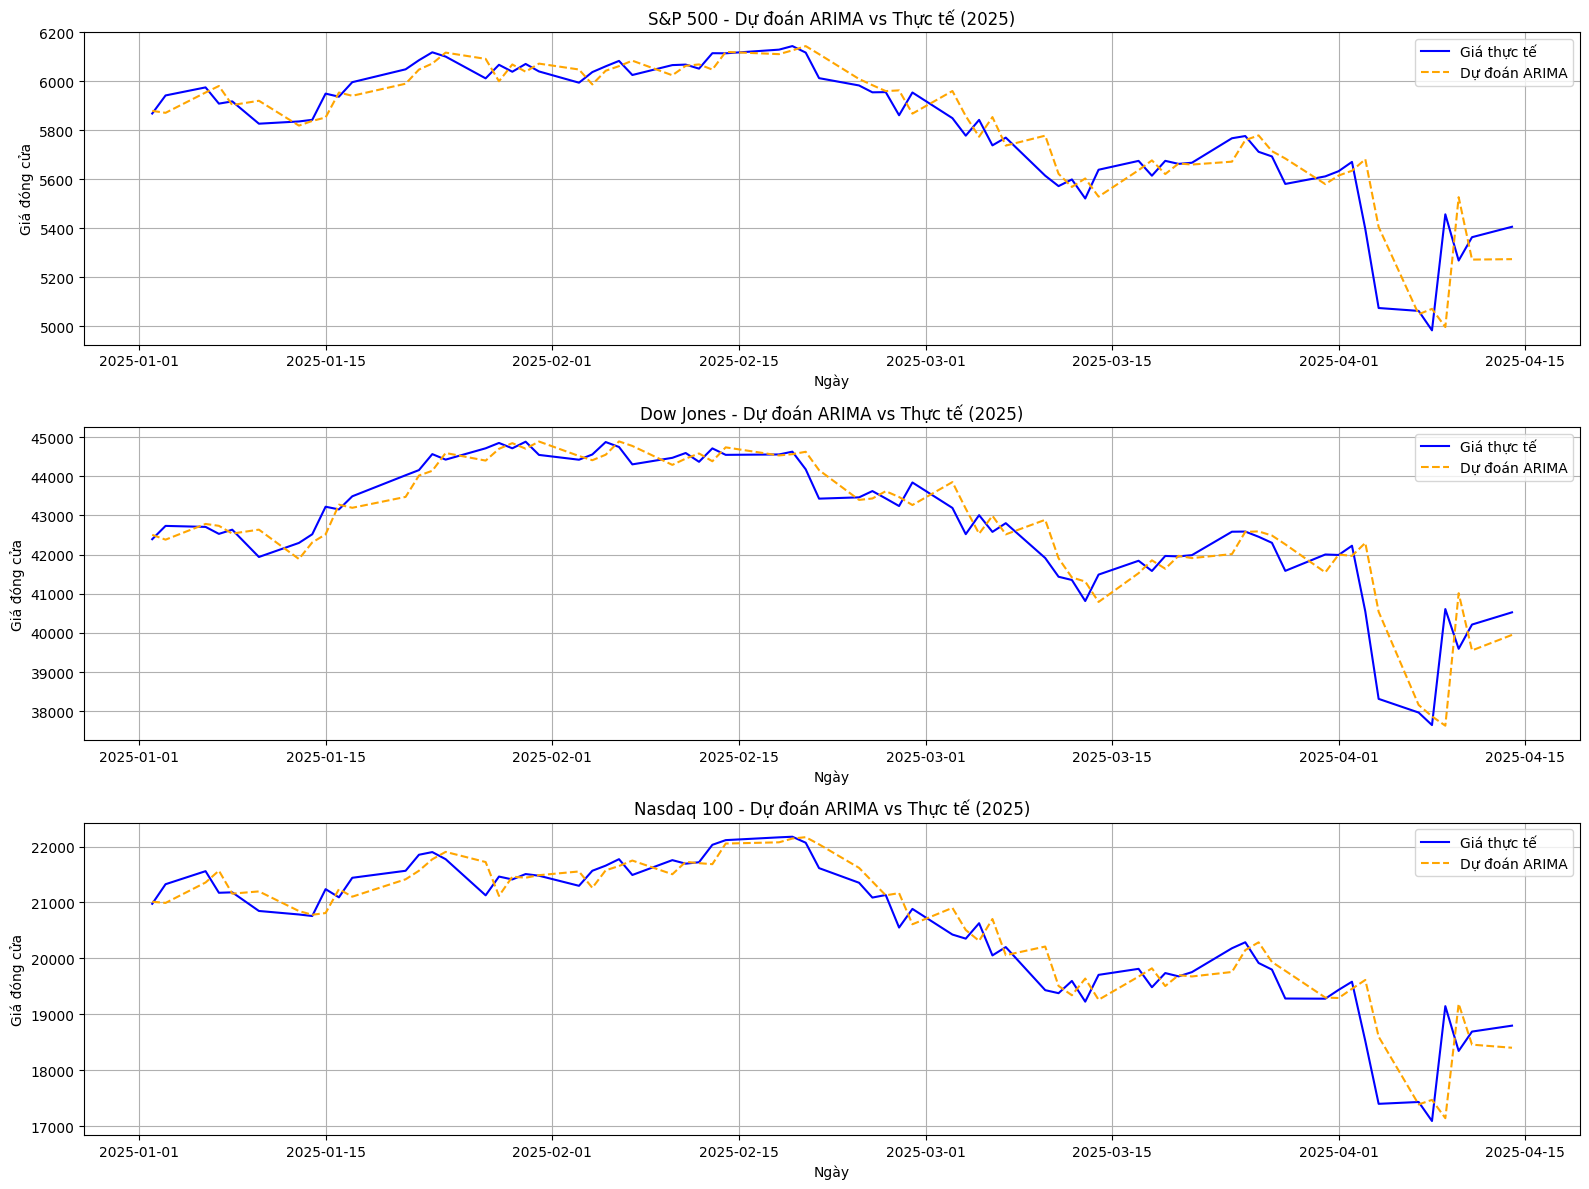

In [32]:
plt.figure(figsize=(16, 12))

for i, (name, dates, actual, predicted) in enumerate(plot_data):
    plt.subplot(3, 1, i+1)
    plt.plot(dates, actual, label="Giá thực tế", color='blue')
    plt.plot(dates, predicted, label="Dự đoán ARIMA", linestyle='--', color='orange')
    plt.title(f"{name} - Dự đoán ARIMA vs Thực tế (2025)")
    plt.xlabel("Ngày")
    plt.ylabel("Giá đóng cửa")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
results = np.array(results)
avg_mae, avg_mse, avg_rmse, avg_mape = results.mean(axis=0)

print("\n Trung bình trên cả 3 chỉ số:")
print(f"MAE: {avg_mae:.2f}")
print(f"MSE: {avg_mse:.2f}")
print(f"RMSE: {avg_rmse:.2f}")
print(f"MAPE: {avg_mape:.2f}%")



 Trung bình trên cả 3 chỉ số:
MAE: 258.09
MSE: 201396.23
RMSE: 390.62
MAPE: 1.22%
